## Here the edf data will be taken from sub-(sub_no)_task-Sleep_acq-psg_eeg.edf
## the edf data will be taken from sub-(sub_no)_task-Sleep_acq-headband_eeg.edf
then these 2 will be compared and analysed



In [1]:
sub_no = 28 # this is sample subject no

In [2]:
import mne
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing edf Datasets
edf_file_hb = f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-headband_eeg.edf'
raw_hb = mne.io.read_raw_edf(edf_file_hb, preload=True)
raw_hb = raw_hb.pick(['HB_1', 'HB_2'])
# Access EEG data and channel names
eeg_data_hb = raw_hb.get_data()
channel_names_hb = raw_hb.ch_names
sampling_rate_hb = raw_hb.info['sfreq']

print(f"EEG Data Shape: {eeg_data_hb.shape}")
print(f"Channel Names: {channel_names_hb}")
print(f"Sampling Rate: {sampling_rate_hb}")

Extracting EDF parameters from C:\Users\naikh\SleepResearchCode_experient\Dataset_clean_for_jupyter\sub-28\eeg\sub-28_task-Sleep_acq-headband_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6598143  =      0.000 ... 25773.996 secs...
EEG Data Shape: (2, 6598144)
Channel Names: ['HB_1', 'HB_2']
Sampling Rate: 256.0


In [4]:
#Importing tsv Dataset
tsv_file = f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-psg_events.tsv'
labels_df = pd.read_csv(tsv_file, sep='\t')  # Read TSV

# Access label data
labels = labels_df['majority'].values 
timestamps = labels_df['onset'].values #timestamps.

print(labels_df.head())

   onset  duration  begsample  endsample  offset  majority  ai_psg
0      0        30          1       7680       0         0       0
1     30        30       7681      15360       0         0       0
2     60        30      15361      23040       0         0       0
3     90        30      23041      30720       0         0       0
4    120        30      30721      38400       0         0       0


In [5]:
#Importing edf Datasets
edf_file_psg = f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-psg_eeg.edf'
raw_psg = mne.io.read_raw_edf(edf_file_psg, preload=True)
raw_psg = raw_psg.pick(['PSG_F3', 'PSG_F4', 'PSG_C3', 'PSG_C4', 'PSG_O1', 'PSG_O2'])


# Access EEG data and channel names
eeg_data_psg = raw_psg.get_data()
channel_names_psg = raw_psg.ch_names
sampling_rate_psg = raw_psg.info['sfreq']

print(f"EEG Data Shape: {eeg_data_psg.shape}")
print(f"Channel Names: {channel_names_psg}")
print(f"Sampling Rate: {sampling_rate_psg}")

Extracting EDF parameters from C:\Users\naikh\SleepResearchCode_experient\Dataset_clean_for_jupyter\sub-28\eeg\sub-28_task-Sleep_acq-psg_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6598143  =      0.000 ... 25773.996 secs...


C:\Users\naikh\AppData\Local\Temp\ipykernel_2992\1457002017.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_psg = mne.io.read_raw_edf(edf_file_psg, preload=True)


EEG Data Shape: (6, 6598144)
Channel Names: ['PSG_F3', 'PSG_F4', 'PSG_C3', 'PSG_C4', 'PSG_O1', 'PSG_O2']
Sampling Rate: 256.0


In [13]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import datetime

In [21]:
def analyze_eeg_synchronization(file_x, file_y):
    """
    Analyze time synchronization between two EEG files.
    
    Parameters:
    ----------
    file_x : str
        Path to the first EEG file (x.edf)
    file_y : str
        Path to the second EEG file (y.edf)
        
    Returns:
    -------
    dict
        Dictionary containing synchronization information
    """
    # Read both EDF files
    print(f"Reading {file_x}...")
    raw_x = mne.io.read_raw_edf(file_x, preload=True, verbose=False)
    raw_x=raw_x.pick(['HB_1', 'HB_2'])
    
    print(f"Reading {file_y}...")
    raw_y = mne.io.read_raw_edf(file_y, preload=True, verbose=False)
    raw_y = raw_y.pick(['PSG_F3', 'PSG_F4', 'PSG_C3', 'PSG_C4', 'PSG_O1', 'PSG_O2'])
    # Extract key timing information
    x_info = {
        'start_time': raw_x.info['meas_date'],
        'sampling_freq': raw_x.info['sfreq'],
        'n_times': raw_x.n_times,
        'duration': raw_x.times[-1],
        'channels': raw_x.ch_names
    }
    
    y_info = {
        'start_time': raw_y.info['meas_date'],
        'sampling_freq': raw_y.info['sfreq'],
        'n_times': raw_y.n_times,
        'duration': raw_y.times[-1],
        'channels': raw_y.ch_names
    }
    
    # Check if recordings were simultaneous
    time_diff = None
    simultaneous = False
    overlap = 0
    
    if x_info['start_time'] and y_info['start_time']:
        # Calculate time difference in seconds
        time_diff = (y_info['start_time'] - x_info['start_time']).total_seconds()
        
        # Calculate overlap
        x_end_time = x_info['start_time'] + datetime.timedelta(seconds=x_info['duration'])
        y_end_time = y_info['start_time'] + datetime.timedelta(seconds=y_info['duration'])
        
        # Calculate overlap period
        latest_start = max(x_info['start_time'], y_info['start_time'])
        earliest_end = min(x_end_time, y_end_time)
        
        # Check if there is overlap
        if latest_start < earliest_end:
            overlap = (earliest_end - latest_start).total_seconds()
            simultaneous = True
    
    # Prepare data for visualization - extract a short segment of data for comparison
    # Choose a segment where both recordings overlap if simultaneous
    segment_length = min(10, overlap) if simultaneous else min(10, x_info['duration'], y_info['duration'])
    
    if simultaneous and overlap > 0:
        # Calculate time indices for overlapping segment
        if time_diff > 0:  # y starts after x
            x_start_idx = int(time_diff * x_info['sampling_freq'])
            y_start_idx = 0
        else:  # x starts after y
            x_start_idx = 0
            y_start_idx = int(abs(time_diff) * y_info['sampling_freq'])
            
        # Extract data segments
        x_data, x_times = raw_x[:, x_start_idx:x_start_idx + int(segment_length * x_info['sampling_freq'])]
        y_data, y_times = raw_y[:, y_start_idx:y_start_idx + int(segment_length * y_info['sampling_freq'])]
    else:
        # Extract data from the beginning of each recording
        x_data, x_times = raw_x[:, :int(segment_length * x_info['sampling_freq'])]
        y_data, y_times = raw_y[:, :int(segment_length * y_info['sampling_freq'])]
    
    # Create visualizations to compare the signals
    plt.figure(figsize=(15, 10))
    
    # Plot x.edf channels
    for i, ch_name in enumerate(x_info['channels']):
        plt.subplot(len(x_info['channels']) + len(y_info['channels']), 1, i+1)
        plt.plot(x_times, x_data[i], 'b-', linewidth=0.8)
        plt.title(f'x.edf - {ch_name}')
        plt.ylabel('μV')
        if i < len(x_info['channels']) - 1:
            plt.xticks([])
    
    # Plot y.edf channels
    offset = len(x_info['channels'])
    for i, ch_name in enumerate(y_info['channels']):
        plt.subplot(len(x_info['channels']) + len(y_info['channels']), 1, offset+i+1)
        plt.plot(y_times, y_data[i], 'g-', linewidth=0.8)
        plt.title(f'y.edf - {ch_name}')
        plt.ylabel('μV')
        if i < len(y_info['channels']) - 1:
            plt.xticks([])
    
    plt.xlabel('Time (s)')
    plt.tight_layout()
    plt.savefig('eeg_synchronization.png')
    
    # Analyze correlation between frontal channels if simultaneous
    correlations = {}
    if simultaneous and overlap > 0:
        # Resample if sampling frequencies differ
        if x_info['sampling_freq'] != y_info['sampling_freq']:
            # Resample to the higher frequency
            target_freq = max(x_info['sampling_freq'], y_info['sampling_freq'])
            
            if x_info['sampling_freq'] < target_freq:
                x_data_resampled = mne.filter.resample(x_data, up=target_freq, down=x_info['sampling_freq'])
            else:
                x_data_resampled = x_data
                
            if y_info['sampling_freq'] < target_freq:
                y_data_resampled = mne.filter.resample(y_data, up=target_freq, down=y_info['sampling_freq'])
            else:
                y_data_resampled = y_data
        else:
            x_data_resampled = x_data
            y_data_resampled = y_data
        
        # Calculate cross-correlations between frontal channels
        # Find frontal channels in x.edf
        x_frontal = [i for i, ch in enumerate(x_info['channels']) if 'F3' in ch or 'F4' in ch]
        
        # Compare with AF7 and AF8 in y.edf
        for x_idx in x_frontal:
            x_ch = x_info['channels'][x_idx]
            for y_idx in range(len(y_info['channels'])):
                y_ch = y_info['channels'][y_idx]
                
                # Make sure the signals have the same length
                min_len = min(len(x_data_resampled[x_idx]), len(y_data_resampled[y_idx]))
                
                # Calculate correlation
                corr = np.corrcoef(x_data_resampled[x_idx][:min_len], y_data_resampled[y_idx][:min_len])[0, 1]
                correlations[f"{x_ch}-{y_ch}"] = corr
    
    # Summarize findings
    sync_info = {
        'x_file_info': x_info,
        'y_file_info': y_info,
        'time_difference_seconds': time_diff,
        'simultaneous_recording': simultaneous,
        'overlap_duration_seconds': overlap,
        'channel_correlations': correlations
    }
    
    return sync_info

In [22]:
def print_synchronization_report(sync_info):
    """Print a detailed report about the synchronization between two EEG files."""
    print("\n" + "="*50)
    print("EEG SYNCHRONIZATION ANALYSIS REPORT")
    print("="*50)
    
    print("\nFILE INFORMATION:")
    print(f"x.edf: {len(sync_info['x_file_info']['channels'])} channels, {sync_info['x_file_info']['duration']:.2f}s duration")
    print(f"      Channels: {', '.join(sync_info['x_file_info']['channels'])}")
    print(f"      Sampling rate: {sync_info['x_file_info']['sampling_freq']} Hz")
    
    print(f"\ny.edf: {len(sync_info['y_file_info']['channels'])} channels, {sync_info['y_file_info']['duration']:.2f}s duration")
    print(f"      Channels: {', '.join(sync_info['y_file_info']['channels'])}")
    print(f"      Sampling rate: {sync_info['y_file_info']['sampling_freq']} Hz")
    
    print("\nSYNCHRONIZATION STATUS:")
    if sync_info['simultaneous_recording']:
        print("✓ Files contain SIMULTANEOUS recordings")
        print(f"  ↳ Time difference: {abs(sync_info['time_difference_seconds']):.2f} seconds")
        print(f"  ↳ Overlapping duration: {sync_info['overlap_duration_seconds']:.2f} seconds")
        
        if sync_info['time_difference_seconds'] > 0:
            print(f"  ↳ y.edf starts {sync_info['time_difference_seconds']:.2f}s AFTER x.edf")
        elif sync_info['time_difference_seconds'] < 0:
            print(f"  ↳ y.edf starts {abs(sync_info['time_difference_seconds']):.2f}s BEFORE x.edf")
        else:
            print("  ↳ Recordings start at EXACTLY the same time")
    else:
        print("✗ Files do NOT contain simultaneous recordings")
        
        if sync_info['time_difference_seconds'] is not None:
            print(f"  ↳ Time between recordings: {abs(sync_info['time_difference_seconds']):.2f} seconds")
    
    # Print correlation information if available
    if sync_info['channel_correlations']:
        print("\nCHANNEL CORRELATIONS:")
        for pair, corr in sync_info['channel_correlations'].items():
            quality = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
            print(f"  {pair}: {corr:.3f} ({quality})")
    
    print("\nCONCLUSION:")
    if sync_info['simultaneous_recording']:
        if sync_info['overlap_duration_seconds'] > 60:
            print("The files contain substantial overlapping EEG data and can be analyzed together.")
        else:
            print(f"The files overlap for only {sync_info['overlap_duration_seconds']:.2f} seconds, which may be insufficient for joint analysis.")
    else:
        print("The files do not contain simultaneous recordings and should be analyzed separately.")
    
    print("="*50)


Reading Dataset_clean_for_jupyter/sub-28/eeg/sub-28_task-Sleep_acq-headband_eeg.edf...
Reading Dataset_clean_for_jupyter/sub-28/eeg/sub-28_task-Sleep_acq-psg_eeg.edf...


C:\Users\naikh\AppData\Local\Temp\ipykernel_2992\2418583175.py:23: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_y = mne.io.read_raw_edf(file_y, preload=True, verbose=False)



EEG SYNCHRONIZATION ANALYSIS REPORT

FILE INFORMATION:
x.edf: 2 channels, 25774.00s duration
      Channels: HB_1, HB_2
      Sampling rate: 256.0 Hz

y.edf: 6 channels, 25774.00s duration
      Channels: PSG_F3, PSG_F4, PSG_C3, PSG_C4, PSG_O1, PSG_O2
      Sampling rate: 256.0 Hz

SYNCHRONIZATION STATUS:
✓ Files contain SIMULTANEOUS recordings
  ↳ Time difference: 0.00 seconds
  ↳ Overlapping duration: 25774.00 seconds
  ↳ Recordings start at EXACTLY the same time

CONCLUSION:
The files contain substantial overlapping EEG data and can be analyzed together.


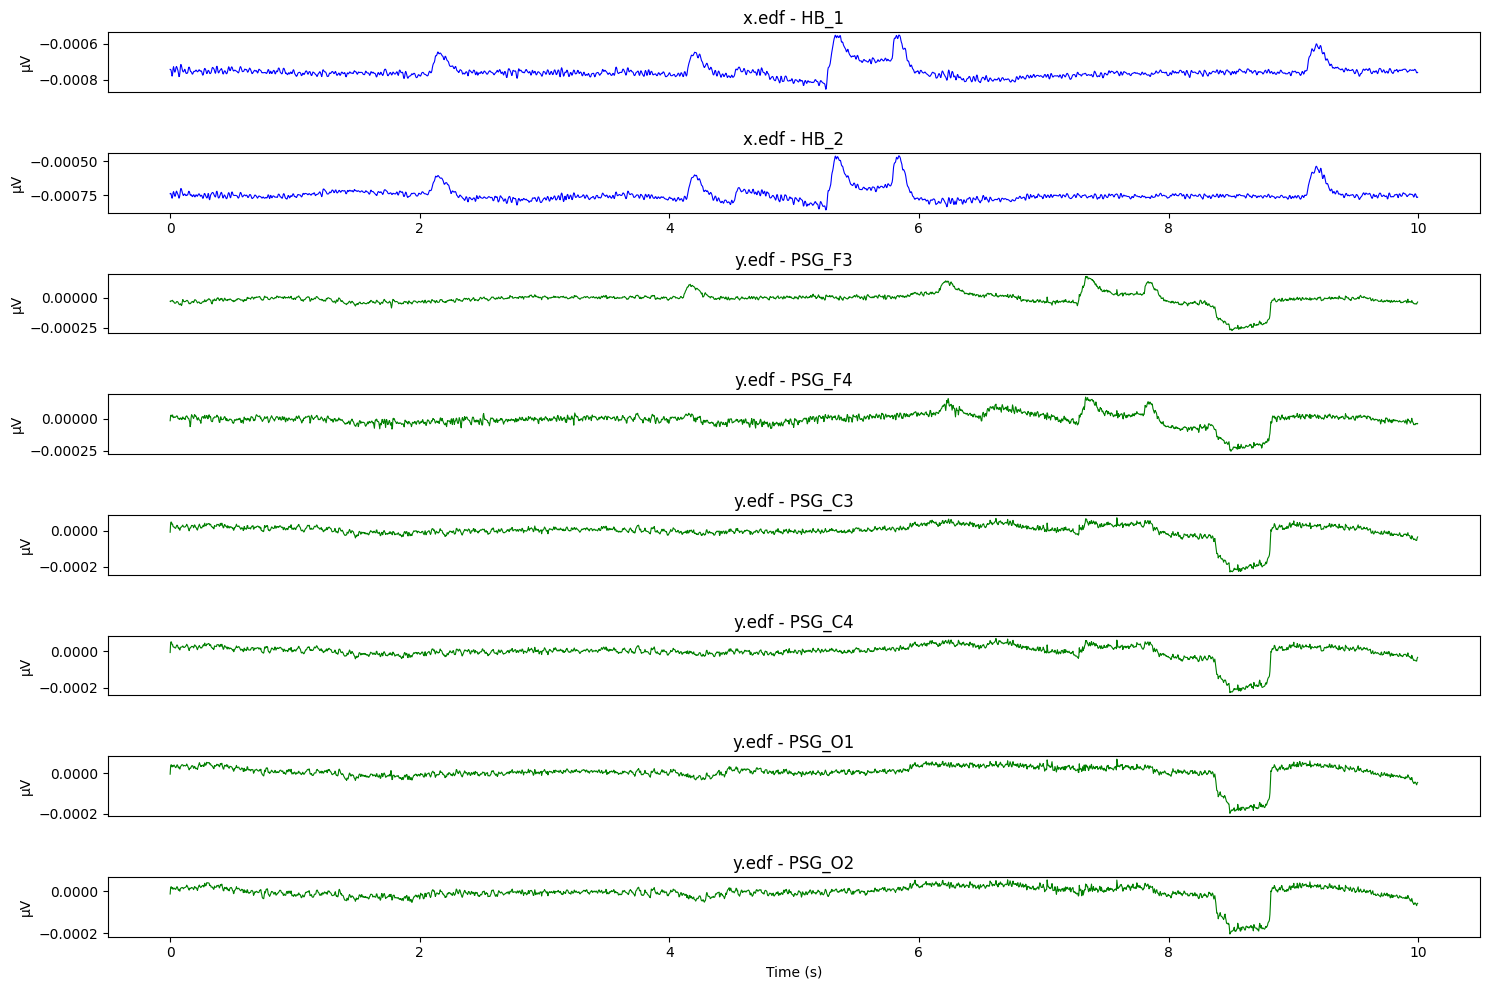

In [23]:
sync_info = analyze_eeg_synchronization(  f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-headband_eeg.edf',f'Dataset_clean_for_jupyter/sub-{sub_no}/eeg/sub-{sub_no}_task-Sleep_acq-psg_eeg.edf')
print_synchronization_report(sync_info)